## **Customer Lifetime Value Prediction**
---

## **Business Problem Understanding**

**Context**

Dalam berbisnis, untuk mendapatkan customer baru bisa [sampai 25 kali](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) lebih mahal daripada mempertahankan customer lama (customer retention). Customer retention menjadi kunci dari sumber pendapatan yang stabil bagi perusahaan karena pembelian berulang dari existing customer membuat bisnis perusahaan tetap berjalan. Oleh karena itu, perusahaan perlu melihat seberapa valuable customer terhadap bisnis perusahaan. Untuk mengukur hal tersebut, terdapat sebuah metrik yang dapat digunakan yaitu metrik **Customer Lifetime Value (CLV)**.

Customer Lifetime Value (CLV) adalah jumlah uang yang dikeluarkan customer untuk perusahaan sepanjang hubungan bisnis antara customer dengan perusahaan tersebut. Secara sederhananya, CLV adalah prediksi atas nilai keseluruhan revenue yang bisa didapatkan dari customer tersebut. Memahami dan meningkatkan CLV di perusahaan dapat meningkatkan keuntungan perusahaan, membantu merencanakan anggaran, dan menganalisis kepuasan pelanggan. Pada implementasinya, metrik CLV banyak digunakan oleh perusahaan yang melakukan repeat sales kepada customer (misal. makanan, produk rumah tangga) maupun perusahaan yang menggunakan sistem berlangganan dalam bisnisnya (misal. asuransi, perusahaan telekomunikasi).  

**Problem Statement**

Dalam project ini, terdapat sebuah perusahaan asuransi mobil di Amerika Serikat mengalami issue dalam meningkatkan revenue perusahaan. Salah satu penyebab issuenya adalah karena pendekatan strategi marketing yang tidak tepat dimana perusahaan mengeluarkan budget yang sama untuk seluruh tipe customer, sehingga perusahaan akhirnya membayar lebih untuk low-value customer dan kehilangan high-value customer. Maka dari itu, perusahaan menggunakan metrik CLV agar dapat menentukan seberapa valuable customer yang dimiliki dan strategi marketing yang akan digunakan berdasarkan CLV tersebut. Namun perusahaan asuransi mobil ini belum memiliki sistem untuk memprediksi CLV dengan cepat dan akurat sehingga penentuan strategi marketing saat ini memakan waktu lebih lama karena pengolahan data yang masih secara manual. Oleh karena itu, prediksi CLV yang lebih cepat dan akurat sangatlah penting untuk dapat mengambil strategi marketing yang lebih tepat pula.

**Goals**

Berdasarkan permasalahan diatas, tentunya akan sangat mudah bagi perusahaan asuransi mobil (khususnya divisi marketing) apabila terdapat 'tools' untuk memprediksi CLV dengan melihat dari data demografis dan data asuransi mobil customer (tipe asuransi, jumlah polis, biaya premi, total klaim, dan lainnya) sehingga pengolahan data CLV tidak lagi secara manual dan dapat mempercepat proses pengambilan keputusan strategi marketing.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah kita akan menganalisis data yang dapat menemukan pola dari feature-feature yang ada, untuk membedakan CLV masing-masing customer. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tools' prediksi CLV.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi CLV sesuai dengan limitasi feature yang digunakan. 

---

## **Data Understanding**

- Dataset merupakan data customer asuransi mobil di Amerika Serikat tahun 2019
- Sumber dataset: [Link](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data)
- Informasi atribut menggunakan informasi dari Kaggle user lain karena tidak ditemukannya pada sumber dataset awal: [Link](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook)

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Vehicle type classification |
| Coverage | Object | Types of vehicle insurance coverage |
| Renew Type Offer | Object | Offer to renew policies that have been/will expire |
| EmploymentStatus | Object | Customer's employment status |
| Marital Status | Object | Customer's marital status |
| Education | Object | Customer's educational level |
| Number of Policies | Float | Number of policies owned by the customer |
| Monthly Premium Auto | Float | Monthly premium paid by the insured |
| Total Claim Amount | Float | Cumulative number of claims since the beginning of the policy |
| Income | Float | Customer's income (in dollar) |
| Customer Lifetime Value | Float | Customer Lifetime Value (Target) |

## **Import Libraries**

Mengimport library yang dibutuhkan untuk eksplorasi dataset.

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Load Dataset

In [3]:
# Menampilkan dataset Customer Lifetime Value
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [4]:
# Cek informasi dataset
# Tipe data dalam dataset berisikan data tipe 'object' dan 'float'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [5]:
# Menampilkan statistik deskriptif dari numerical & categorical variable
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [6]:
# Memeriksa apakah ada missing value pada dataset
print(f'Apakah terdapat missing value?', 'Ada' if df.isna().sum().any() == True else 'Tidak ada')
print(f'Jumlah data missing value: {df.isna().sum().sum()}')

Apakah terdapat missing value? Tidak ada
Jumlah data missing value: 0


## **EDA**

### Distribution of Customer Lifetime Value (Target)

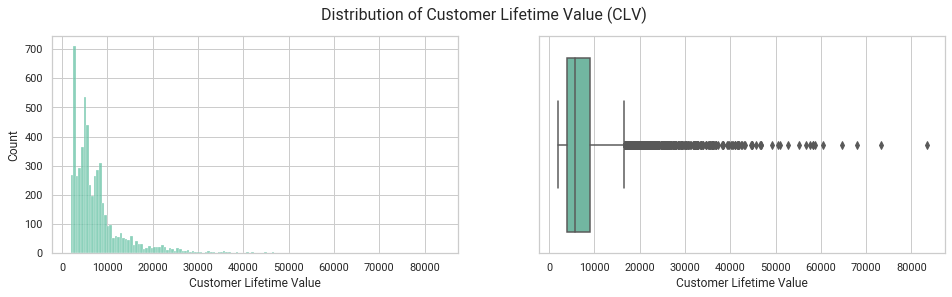

In [7]:
sns.set_theme(style='whitegrid', font='Roboto', palette='Set2')
fig = plt.figure(figsize=(16,4))

fig.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

Berdasarkan plot distribusi `Customer Lifetime Value` di atas, terlihat bahwa data tersebut 'right-skewed distribution' dimana diartikan bahwa banyak customer dengan 'low CLV' dan sangat sedikit customer dengan 'high CLV'. Serta dalam boxplot dapat terlihat bahwa terdapat customer dengan `Customer Lifetime Value`  yang ekstrim (outlier) pada nilai diatas ± 16000.

### Distribution of Numerical Feature

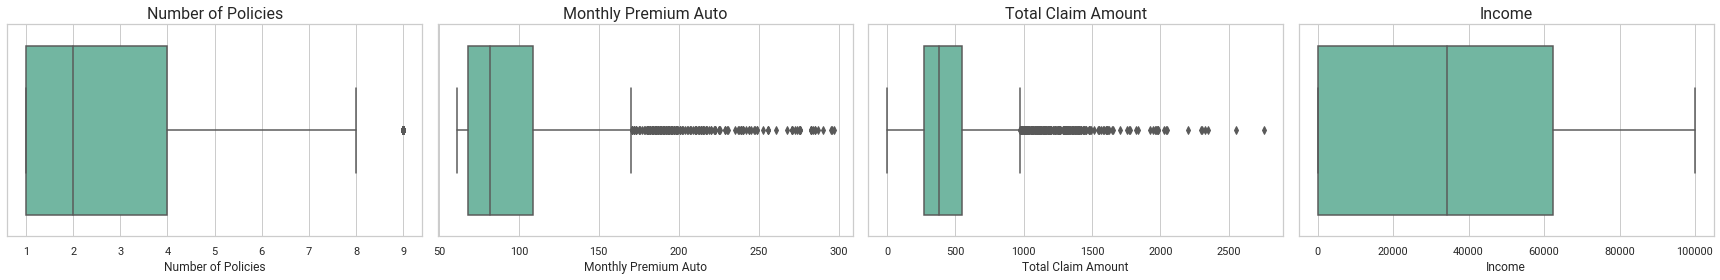

In [8]:
# Membuat variable khusus untuk feature numerical
numerical_cols = list(df.describe().columns[:-1])

plt.figure(figsize=(24,4))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(1,4,num_subplot)
    sns.boxplot(data=df, x=i)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Melihat dari distribusi feature numerical, diketahui bahwa feature-feature tersebut tidak terdistribusi normal (skewed) serta terdapat outlier pada feature `Number of Policies`, `Monthly Premium Auto`, dan `Total Claim Amount` dimana akan dihandling pada bagian Data Preprocessing. Namun karena saya ingin melihat korelasi feature numerical dengan target, maka diperlukan visualisasi dengan scatterplot dan heatmap.

### Correlation of Numerical Feature vs Target

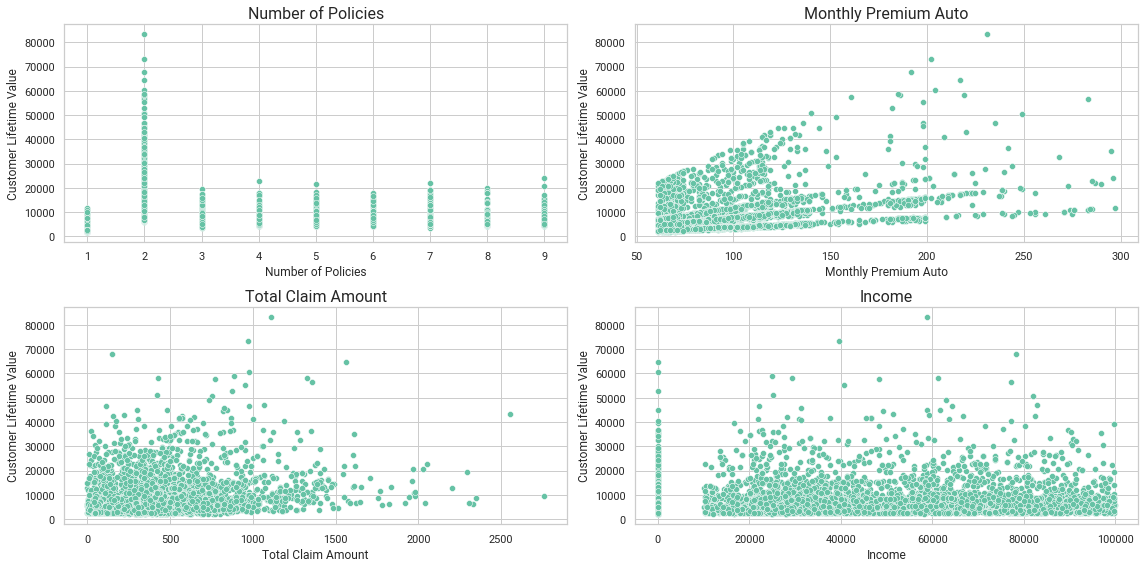

In [9]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Setelah ditampilkan melalui scatterplot, didapatkan insight berupa:
- Pada feature `Number of Policies`, customer dengan jumlah polis sebanyak 2 polis adalah customer yang lebih valuable daripada customer dengan jumlah polis lainnya. Customer yang memiliki selain 2 polis dapat diasumsikan sebagai 'low-value' customer.
- Pada feature `Monthly Premium Auto`, terbentuk seperti pola menyebar dimana semakin tinggi premi asuransi kendaraan yang dibayarkan setiap bulannya maka semakin valuable customer tersebut. 
- Pada feature `Total Claim Amount` menunjukkan bahwa nominal klaim < $1.000 banyak dilakukan oleh customer dengan 'low CLV'. Namun untuk nominal klaim > $1.000 tidak menunjukkan pola spesifik (klaim > $1.000 dilakukan baik oleh 'low CLV' maupun 'high CLV' customer).
- Dan pada feature `Income` menunjukkan bahwa ternyata terdapat customer yang tidak mempunyai pendapatan namun memiliki `CLV` yang beragam hingga diatas 60.000. Selebihnya data `Income` tidak menunjukkan perubahan pola yang signifikan.

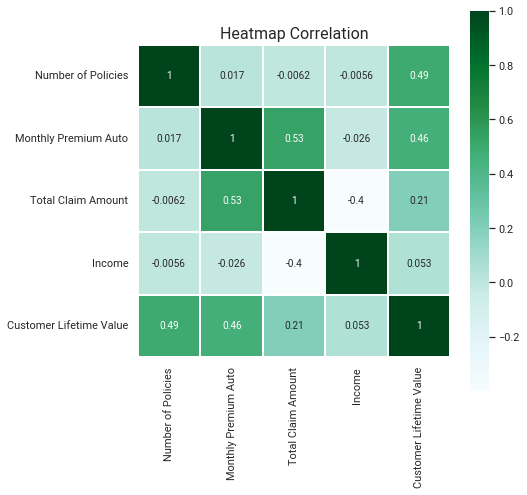

In [10]:
# Menampilkan nilai korelasi antar feature numerical vs target
corr = df.corr('spearman')

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, square=True, cmap='BuGn', linewidths=0.05)
plt.title('Heatmap Correlation', size=16);

Heatmap diatas menunjukkan bahwa `Customer Lifetime Value` memiliki korelasi positif terkuat dengan feature  `Number of Policies` (0.49). Sedangkan feature `Income` menjadi feature yang berkorelasi terlemah dengan `Customer Lifetime Value` (0.053). Selain itu ternyata terdapat sesama feature yang berkorelasi kuat yaitu `Monthly Premium Auto` dan `Total Claim Amount` (0.53)

### Distribution of Categorical Feature

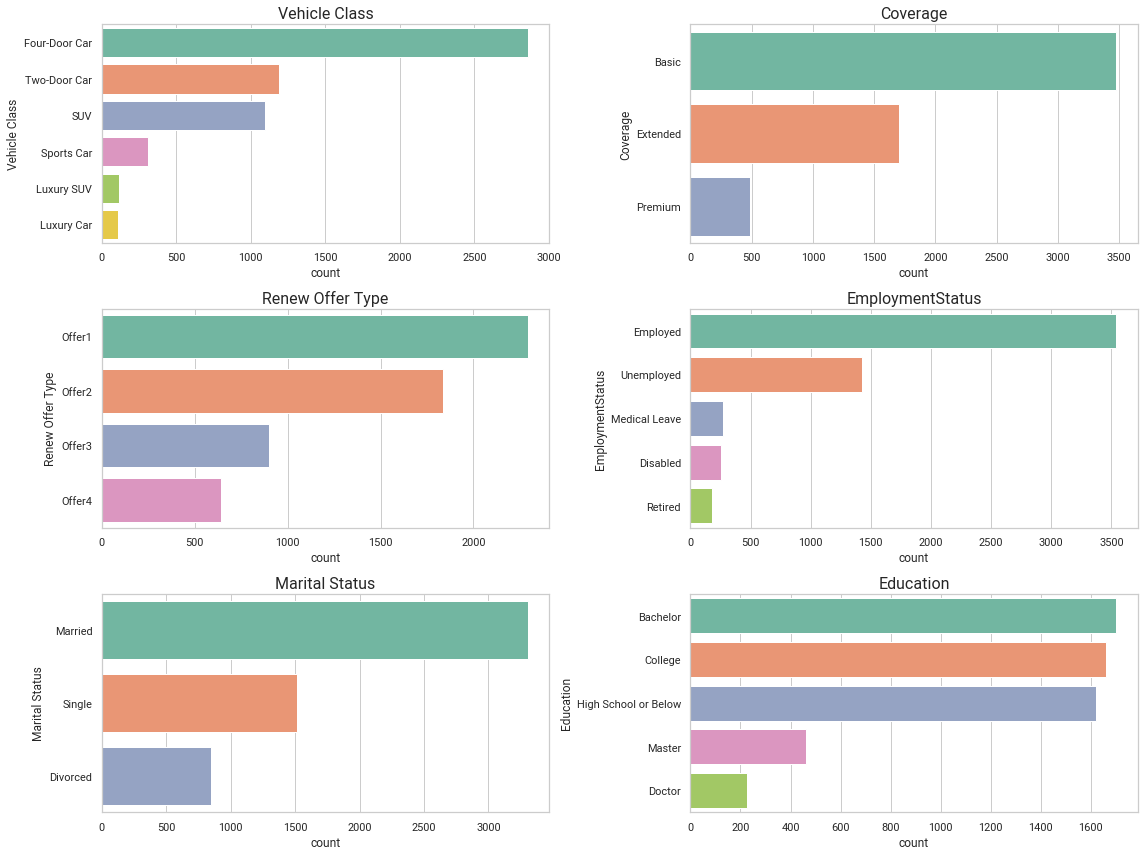

In [19]:
# Membuat variable khusus untuk feature categorical
categorical_cols = list(df.describe(include='O').columns)

plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.countplot(data=df, y=i, order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Bila dilihat dari feature categorical, diketahui bahwa:
- Customer yang memiliki kendaraan Four-Door Car menjadi customer terbanyak yang mengasuransikan kendaraannya.
- Mayoritas customer mengambil paket `Coverage` Basic sebagai paket asuransi kendaraannya.
- Apabila akan memperpanjang polis, mayoritas customer menerima Offer 1 daripada offer lainnya.
- Customer asuransi kendaraan paling banyak berstatus sudah bekerja, sudah menikah, dan berstatus pendidikan sarjana (Bachelor).

### Distribution of Categorical Feature vs Target

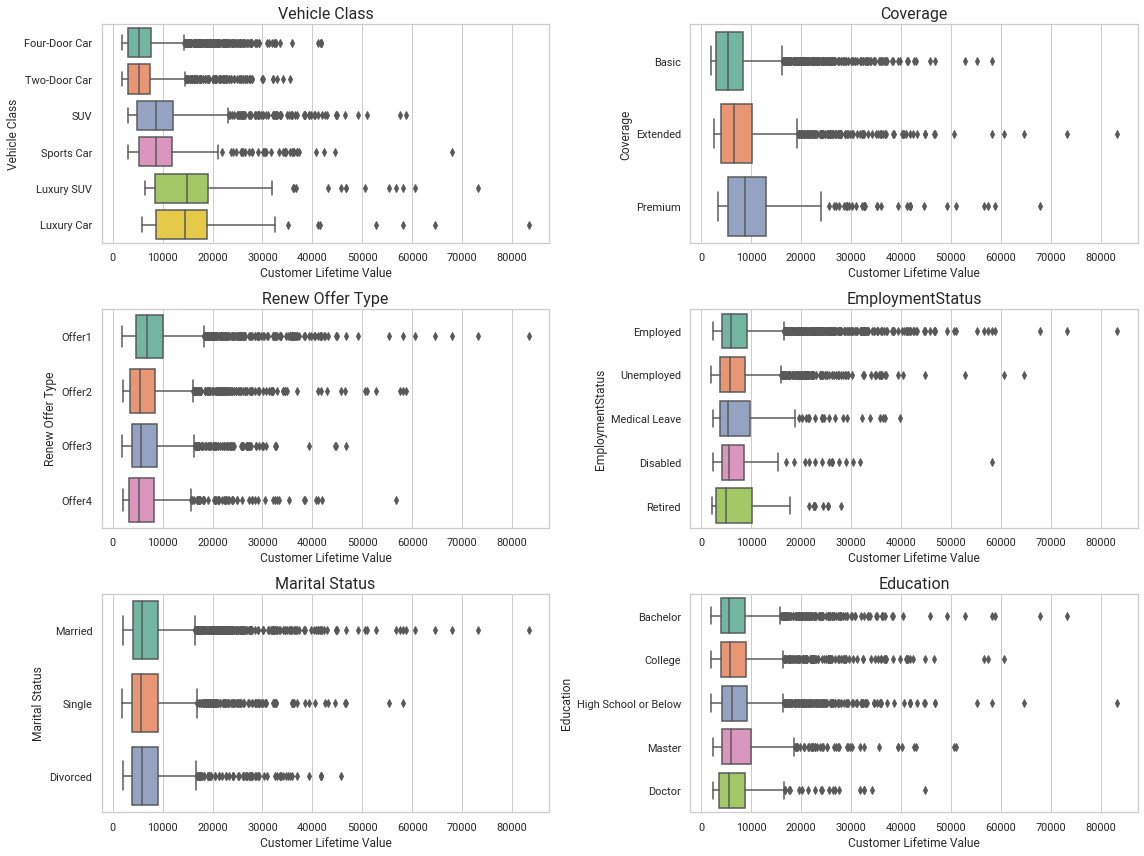

In [12]:
plt.figure(figsize=(16,12))
num_subplot = 1

for i in categorical_cols:
    plt.subplot(3,2,num_subplot)
    sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Apabila distribusi feature categorical ditampilkan dengan target, didapatkan bahwa:
- Customer dengan kendaraan tipe luxury (Luxury SUV / Luxury Car) adalah customer dengan 'high CLV' dari customer dengan tipe kendaraan lainnya.
- Customer dengan `Coverage` Premium memiliki nilai CLV lebih tinggi daripada tipe `Coverage` lainnya.
- Customer yang menerima Offer 1 cenderung adalah customer yang 'high-CLV' daripada yang menerima tipe offer lainnya.
- 'High-CLV' customer juga ditemukan lebih banyak pada customer yang sudah bekerja dan sudah menikah.


### Other Correlation

Untuk menambahkan pemahaman terkait dataset, saya juga menampilkan scatterplot feature numerical dengan CLV namun dibedakan berdasarkan hue dari feature `Coverage` dan `Vehicle Class`.

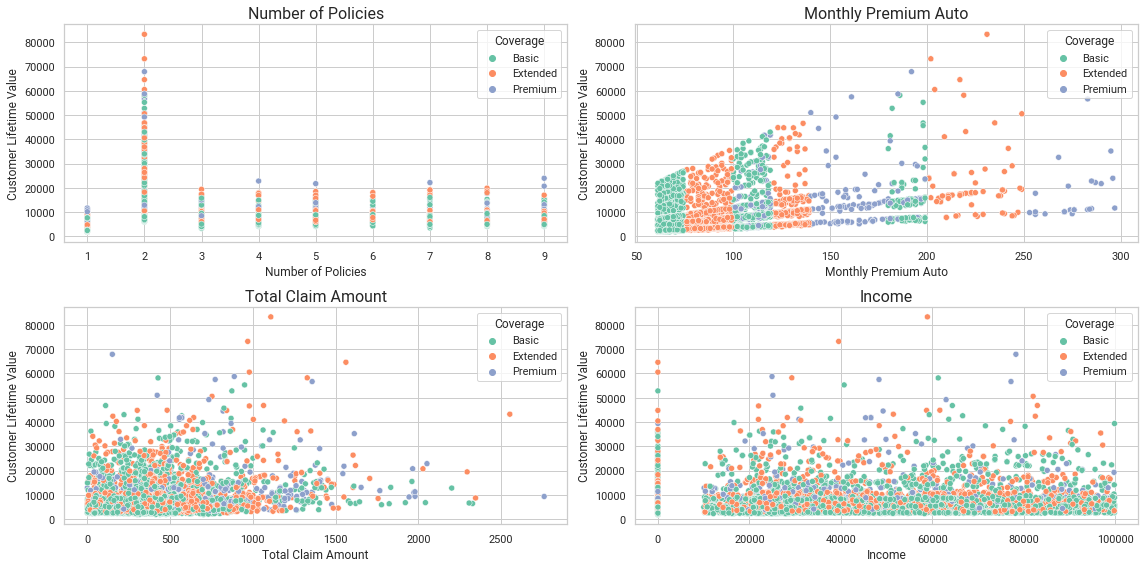

In [21]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'])
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Berdasarkan scatterplot diatas, ditemukan terdapat perubahan pola yang signifikan pada `Monthly Premium Auto` vs `Customer Lifetime Value` yang dibedakan berdasarkan `Coverage`-nya. Hal diatas menunjukkan bahwa kemungkinan untuk masing-masing `Coverage` terdapat pembagian kelas lagi didalamnya (misal. Basic I, Basic II, Basic III, dst.) dimana rentang premi yang dibayarkan juga berbeda. Namun hal tersebut tidak terdapat dalam dataset.

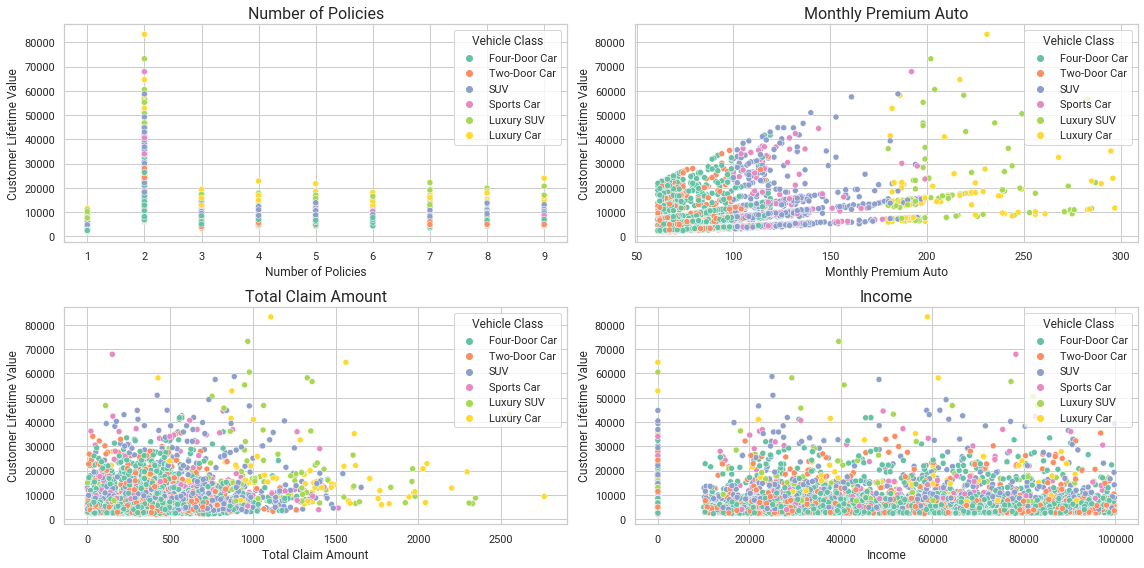

In [22]:
plt.figure(figsize=(16,8))
num_subplot = 1

for i in numerical_cols:
    plt.subplot(2,2,num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Vehicle Class')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot+=1

Kemudian scatterplot yang sama namun dibedakan berdasarkan `Vehicle Class`-nya juga menunjukkan pola yang juga berbeda pada `Monthly Premium Auto` vs `Customer Lifetime Value` dimana:
- Tipe kendaraan 'Four-Door-Car' dan 'Two-Door-Car' memiliki premi dengan rentang ± $60-100.
- Tipe kendaraan 'SUV' dan 'Sports Car' memiliki premi dengan rentang ± $100-170.
- Tipe kendaraan 'Luxury SUV' dan 'Luxury Car' memiliki premi dengan rentang ± $170-300.

## **Data Preprocessing**

Pada tahap ini, saya akan melakukan beberapa tahap feature engineering pada dataset agar data yang dapat digunakan dengan baik untuk modeling selanjutnya. Feature engineering ini sangat penting karena sesuai dengan konsep Machine Learning 'Garbage in Garbage Out' bahwa sebagus apapun prosesnya atau secanggih apapun metode/modeling yang digunakan, ketika yang kita input 'sampah' hasilnya pun akan menjadi 'sampah' (input data yang tidak bagus menghasilkan modeling yang tidak bagus pula).

Untuk feature engineering ini, yang akan saya lakukan adalah:
- Drop duplicated data
- Drop outlier
- Encoding

Sebelum memulai, saya akan menduplikat dataset awal menjadi dataset baru khusus untuk preprocessing dan modeling agar tidak mengubah nilai/bentuk dari dataset awal.

In [23]:
# Membuat duplikat dataset agar tidak mengubah dataset awal
df_model = df.copy()

### Drop Duplicated Data

In [24]:
print('Apakah terdapat data duplikat? :','Ada' if df_model.duplicated().any() == True else 'Tidak ada')
print(f'Jumlah data duplikat: {df_model.duplicated().sum()}')

Apakah terdapat data duplikat? : Ada
Jumlah data duplikat: 618


In [25]:
# Menampilkan dataframe yang berisi data duplikat
df_model[df_model.duplicated()].sort_values('Customer Lifetime Value').head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2763,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755


Pada dataset ini, diketahui bahwa terdapat 618 data customer yang duplikat. Maksud dari data duplikat sendiri adalah data customer yang memiliki nilai sama persis dengan data customer di baris lainnya. Drop duplikat data perlu dilakukan agar saat modeling, algoritmanya belajar dari data yang spesifik saja. Apabila data duplikat dibiarkan, maka algoritma model akan terlalu mempelajari data yang duplikat tersebut dan menghasilkan prediksi data yang kurang baik (bias). Oleh karena itu, selanjutnya akan di drop 618 data duplikat tersebut.

In [26]:
# Drop data duplicates
df_model = df_model.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'Jumlah baris dataset: {df_model.shape[0]}\nJumlah kolom dataset: {df_model.shape[1]}')

Jumlah baris dataset: 5051
Jumlah kolom dataset: 11


### Outlier Detection

Outlier merupakan data poin yang nilainya berbeda atau jauh daripada observasi pada umumnya. Banyaknya outlier juga dapat mempengaruhi hasil analisis dan permodelan yang dilakukan. Treatment outlier tidak bisa serta merta langsung menghapus outlier yang ada dalam dataset karena berpotensi menghilangkan banyak data, oleh karena itu treatment outlier juga perlu mempertimbangkan dari sisi domain knowledge. Namun dengan melakukan treatment outlier, maka modeling nantinya akan memiliki limitasi dalam memprediksi CLV berdasarkan dataset yang bersih saja. Diluar dari rentang data, hasil prediksi dari model akan menjadi tidak akurat.

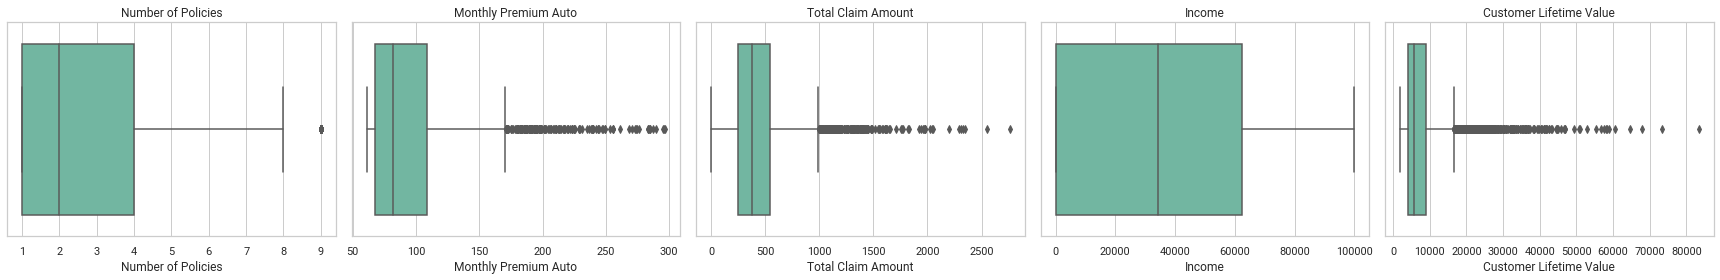

In [27]:
# Menampilkan boxplot untuk melihat outlier
plt.figure(figsize=(24,4))
num_subplot = 1

for i in df.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=df_model, x=i),
    plt.title(i),
    plt.tight_layout()
    num_subplot+=1

Dari boxplot diatas, terlihat adanya outlier pada beberapa feature `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, dan `Customer Lifetime Value`. Dalam project ini, saya akan men-treatment outlier diatas dengan mempertimbangkan nilai IQR dan domain knowledge agar dapat membuat dataset yang lebih bersih sehingga performa model dan prediksi nilai CLV menjadi lebih baik.

In [28]:
# Membuat function deteksi nilai IQR
def iqr_detection(data):
    q1 = df_model[data].quantile(0.25)
    q3 = df_model[data].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Nilai IQR {data}: {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Nilai Upperbound: {upper}')
    print(f'Nilai Lowerbound: {lower}')

#### Feature: Number of Policies

In [29]:
# Melihat nilai IQR dari 'Number of Policies'
iqr_detection('Number of Policies')

Nilai IQR Number of Policies: 3.0
Nilai Upperbound: 8.5
Nilai Lowerbound: -3.5


In [30]:
# Melihat statistik deskriptif dari 'Number of Policies'
df_model['Number of Policies'].describe()

count    5051.000000
mean        2.992081
std         2.386500
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [31]:
# Melihat unique value dari 'Number of Policies' dan jumlah data diatas upperbound
print('Jumlah unique value pada \'Number of Policies\':', df_model['Number of Policies'].unique())
print('Jumlah data diatas nilai upperbound \'Number of Policies\':', len(df_model[df_model['Number of Policies'] > 8.5]))

Jumlah unique value pada 'Number of Policies': [2. 6. 1. 8. 5. 3. 7. 4. 9.]
Jumlah data diatas nilai upperbound 'Number of Policies': 228


Pada feature `Number of Policies`, didapatkan bahwa nilai upperboundnya adalah 8.5 dan dilihat dari jumlah datanya, hanya angka 9 pada `Number of Policies` yang diatas upperbound dengan banyaknya data sebesar 228 customer. Meskipun pada boxplot customer yang memiliki 9 polis termasuk dalam outlier, namun saya tidak mendrop outlier tersebut agar dapat memberikan prediksi untuk customer dengan jumlah polis hingga 9 polis. Keputusan ini juga diperkuat dengan melihat dari heatmap correlation diatas bahwa CLV berkorelasi positif terkuat dengan `Number of Policies`, sehingga saya ingin mengetahui juga apakah `Number of Policies` akan menjadi feature yang berpengaruh atau tidak dalam model.

#### Feature: Monthly Premium Auto

In [32]:
# Melihat nilai IQR dari 'Monthly Premium Auto'
iqr_detection('Monthly Premium Auto')

Nilai IQR Monthly Premium Auto: 41.0
Nilai Upperbound: 170.5
Nilai Lowerbound: 6.5


In [33]:
# Melihat statistik deskriptif dari 'Monthly Premium Auto'
df_model['Monthly Premium Auto'].describe()

count    5051.000000
mean       92.911107
std        34.335010
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [34]:
print('Jumlah data diatas nilai upperbound \'Monthly Premium Auto\':', len(df_model[df_model['Monthly Premium Auto'] > 170.5]))

Jumlah data diatas nilai upperbound 'Monthly Premium Auto': 252


Pada feature `Monthly Premium Auto` didapatkan nilai upperboundnya adalah $170.5 dan jumlah banyaknya data berdasarkan nilai upperbound tersebut adalah sebesar 252 customer. Apabila saya mendrop outlier `Monthly Premium Auto` berdasarkan nilai upperboundnya saja, tentu akan kehilangan cukup banyak data untuk dibuat dalam modeling.

Kemudian apabila digabungkan berdasarkan domain knowlegde, asuransi mobil di Amerika Serikat diatur berdasarkan negara bagiannya dan diberi harga berdasarkan kode posnya sehingga dimungkinkan apabila customer dari New York memiliki biaya premi asuransi mobil yang berbeda dengan customer dari California. Dari riset tahun 2019, diketahui bahwa Michigan adalah negara bagian dengan [rata-rata premi tertinggi](https://www.insurancebusinessmag.com/us/guides/which-us-state-has-the-highest-auto-insurance-premiums-159759.aspx) daripada negara bagian lainnya ($224.42 per bulan / $2.693 per tahun). Sehingga saya mengasumsikan bahwa batas `Monthly Premium Auto` tertinggi adalah $224.42 dan nilai premi diatas nilai tersebut akan saya drop.

Hal ini akan menjadi limitasi model bahwa model yang memprediksi `Monthly Premium Auto` diatas $224.42 akan menjadi kurang akurat.

#### Feature: Total Claim Amount

In [35]:
# Melihat nilai IQR dari 'Total Claim Amount'
iqr_detection('Total Claim Amount')

Nilai IQR Total Claim Amount: 296.34681750000004
Nilai Upperbound: 992.6433477500001
Nilai Lowerbound: -192.74392225000005


In [36]:
# Melihat statistik deskriptif dari 'Total Claim Amount'
df_model['Total Claim Amount'].describe()

count    5051.000000
mean      429.798954
std       293.129102
min         0.423310
25%       251.776304
50%       374.400000
75%       548.123122
max      2759.794354
Name: Total Claim Amount, dtype: float64

In [37]:
print('Jumlah data diatas nilai upperbound \'Total Claim Amount\':', len(df_model[df_model['Total Claim Amount'] > 992.64]))

Jumlah data diatas nilai upperbound 'Total Claim Amount': 217


Pada feature `Total Claim Amount` didapatkan nilai upperboundnya adalah $992.64 dan jumlah banyaknya data berdasarkan nilai upperbound tersebut adalah sebesar 217 customer. Apabila dilakukan drop outlier berdasarkan nilai upperboundnya, maka akan cukup banyak data yang terbuang dan pembuatan model akan menjadi kurang optimal sehingga drop outlier akan dikombinasikan berdasarkan domain knowledge.

Di tahun [2019](https://www.bankrate.com/insurance/car/auto-insurance-statistics/#what-types-of-auto-insurance-claims-are-filed), diketahui bahwa pemilik kendaraan pribadi dapat mengajukan klaim asuransi all risk (comprehensive claims) paling mahal mencapai $1777. Sehingga dalam hal ini saya mengasumsikan bahwa batas `Total Claim Amount` tertinggi adalah $1777 dan nilai diatas nominal tersebut akan saya drop.

Hal ini akan menjadi limitasi model bahwa model yang memprediksi `Total Claim Amount` diatas $1777 akan menjadi kurang akurat.

#### Target: Customer Lifetime Value

In [38]:
# Melihat nilai IQR dari 'Customer Lifetime Value'
iqr_detection('Customer Lifetime Value')

Nilai IQR Customer Lifetime Value: 5064.1236284999995
Nilai Upperbound: 16624.75007525
Nilai Lowerbound: -3631.744438749999


In [39]:
# Melihat statistik deskriptif dari 'Customer Lifetime Value'
df_model['Customer Lifetime Value'].describe()

count     5051.000000
mean      8059.483178
std       6989.189674
min       1898.007675
25%       3964.441004
50%       5837.528088
75%       9028.564632
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [40]:
print('Jumlah data diatas nilai upperbound \'Customer Lifetime Value\':', len(df_model[df_model['Customer Lifetime Value'] > 16624.75]))

Jumlah data diatas nilai upperbound 'Customer Lifetime Value': 449


Terlihat bahwa 75% data pada target `Customer Lifetime Value` bernilai kurang dari 9028.56, sedangkan nilai maksimalnya adalah 83325.38. Hal ini menunjukkan terdapat positive skewness pada distribusinya. Namun apabila dilihat berdasarkan nilai upperboundnya, terdapat 449 data yang `Customer Lifetime Value`-nya lebih besar dari 16624.75. Oleh karena itu, data customer yang memiliki CLV lebih besar dari 16624.75 tidak akan dimasukkan ke dalam pemodelan dan hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

#### Drop Outlier

In [41]:
# Menggabungkan limit outlier menjadi satu dataframe
outlier = df_model[(df_model['Monthly Premium Auto'] > 224.42) | (df_model['Customer Lifetime Value'] > 16624.75) | (df_model['Total Claim Amount'] > 1777)]
len(outlier)

478

Setelah ditentukan batasan-batasan outlier yang akan didrop, selanjutnya saya menggabungkan seluruh batasan tersebut menjadi 1 dataframe bernama 'outlier'. Setelah digabungkan, terdapat 478 data customer yang akan didrop sehingga akan menjadi dataset bersih yang siap diproses lebih lanjut.

In [42]:
# Drop outlier
df_model = df_model.drop(index= outlier.index)

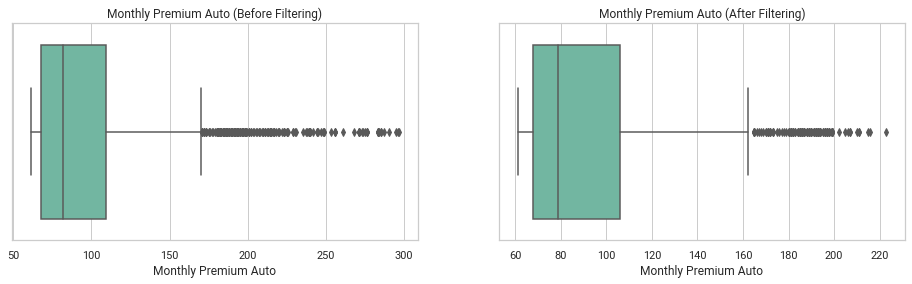

In [43]:
# Menampilkan boxplot 'Monthly Premium Auto' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Monthly Premium Auto').set(title='Monthly Premium Auto (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df_model, x='Monthly Premium Auto').set(title='Monthly Premium Auto (After Filtering)');

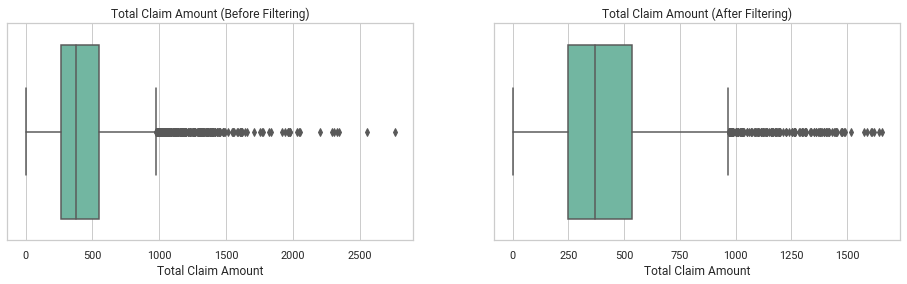

In [44]:
# Menampilkan boxplot 'Total Claim Amount' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Total Claim Amount').set(title='Total Claim Amount (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df_model, x='Total Claim Amount').set(title='Total Claim Amount (After Filtering)');

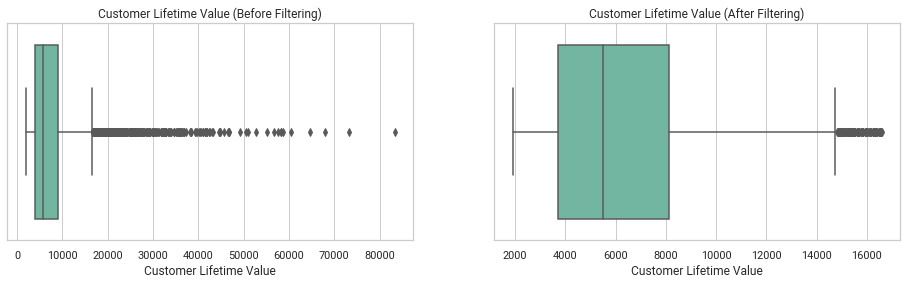

In [45]:
# Menampilkan boxplot 'Customer Lifetime Value' sebelum dan sesudah drop outlier
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Customer Lifetime Value').set(title='Customer Lifetime Value (Before Filtering)')

plt.subplot(1,2,2)
sns.boxplot(data=df_model, x='Customer Lifetime Value').set(title='Customer Lifetime Value (After Filtering)');

#### Clean Dataset

In [46]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4573 non-null   object 
 1   Coverage                 4573 non-null   object 
 2   Renew Offer Type         4573 non-null   object 
 3   EmploymentStatus         4573 non-null   object 
 4   Marital Status           4573 non-null   object 
 5   Education                4573 non-null   object 
 6   Number of Policies       4573 non-null   float64
 7   Monthly Premium Auto     4573 non-null   float64
 8   Total Claim Amount       4573 non-null   float64
 9   Income                   4573 non-null   float64
 10  Customer Lifetime Value  4573 non-null   float64
dtypes: float64(5), object(6)
memory usage: 428.7+ KB


Pada akhirnya, tersisa 4573 baris data yang akan digunakan untuk pemodelan. Ini berarti sekitar 19.3% data sudah tereliminasi (dari drop duplicate dan drop outlier) sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### Data Splitting

In [47]:
# Define X dan y
X = df_model.drop(columns='Customer Lifetime Value')
y = df_model['Customer Lifetime Value']

# Data Splitting dengan proporsi test size 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0)

### Encoding

Encoding adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel categorical menjadi numerical dalam machine learning. Adapun untuk project ini saya menggunakan onehot encoding dan ordinal encoding. Penggunaan onehot encoding ini saya gunakan pada feature categorical nominal karena feature tersebut tidak memiliki banyak unique value dan tidak memiliki tingkatan atas masing-masing valuenya. Sedangkan untuk ordinal encoding saya gunakan pada feature categorical ordinal dimana nilainya memiliki tingkatan. Berikut pembagian encoder yang digunakan:

- Onehot: `Vehicle Class`, `EmploymentStatus`, `Renew Offer type`, `Marital Status`
- Ordinal: `Coverage`, `Education`

Saya akan menggunakan ColumnTransformer untuk meng-encoding feature-feature tersebut yang selanjutnya akan diaplikasikan menggunakan Pipeline modeling.

In [48]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

# Menggabungkan encoder dalam column transformer
col_transform = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping), ['Coverage', 'Education'])
], remainder='passthrough')

col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'mapping': {None: 0,
                                                                      'Basic': 1,
                                                                      'Extended': 2,
                                                                      'Premium': 3}},
                                                         {'col': 'Education',
                                                          'mapping': {None: 0,
                                                                      'Bachelor': 3,
                                                                      'College': 2,
                                                                      'Doctor': 5,
                                                                      'High School or Below': 1,
                                                                      'Master': 4}}]),
                                 ['Coverage', 'Education'])])

### Define Scaler

Karena data yang digunakan memiliki nilai-nilai yang berbeda, maka diperlukan scaling untuk mengubah feature-feature agar memiliki skala yang sama. Untuk tahap cross validation, saya akan menggunakan RobustScaler sebagai scaler awal karena dapat 'less sensitive' terhadap outlier. Scaler terbaik akan ditentukan melalui Hyperparameter Tuning selanjutnya.

In [49]:
# Define scaler
robust = RobustScaler()

## Modeling and Analysis

Pada tahap awal, kita akan melakukan modeling kepada 7 benchmark model yang sudah dipilih. Kemudian hasil dari benchmark model ini berupa scoring dari metrik yang sudah dipilih untuk evaluasi model yaitu RMSE, MAE dan MAPE. Pemilihan ketiga metriks tersebut adalah untuk membandingkan performa model dengan melihat residualnya.

RMSE, MAE, MAPE Formula:

![](http://article.sapub.org/image/10.5923.c.ije.201501.17_052.gif)

Pada dasarnya, RMSE sangatlah sensitif terhadap outlier karena memberikan bobot nilai residual lebih besar dengan dikuadratkan terlebih dahulu, sehingga nilai RMSE akan lebih besar daripada MAE. Namun RMSE berguna untuk mengevaluasi model dengan 'menghukum' residual yang besar lebih banyak daripada MAE. Kekurangan RMSE adalah lebih sulit diinterpretasikan, sehingga saya juga menggunakan MAE untuk mengevaluasi model karena rataan errornya diabsolutkan dan lebih mudah diinterpretasikan. Selain itu, saya juga menggunakan MAPE untuk dapat lebih memudahkan pihak lain memahami persentase error dari model yang dibangun.


### Choose a Benchmark Model

In [50]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)
gbr = GradientBoostingRegressor(random_state= 0)

model = [lr, knn, dt, rf, ada, xgb, gbr]

In [51]:
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Evaluation Metrics yang digunakan
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

for i in model:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

In [52]:
cvresult_before_tuning = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult_before_tuning

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2791.026,190.815,-2090.465,113.824,-0.381,0.007
1,KNN,-2814.742,173.284,-1928.566,99.581,-0.353,0.024
2,Decision Tree,-1262.164,170.587,-452.819,67.857,-0.055,0.006
3,Random Forest,-948.704,112.741,-378.617,39.949,-0.045,0.003
4,AdaBoost,-1385.840,80.156,-988.713,65.636,-0.147,0.008
5,XGBoost,-996.936,152.327,-455.399,49.520,-0.067,0.005
6,Gradient Boost,-917.867,133.303,-404.055,36.333,-0.052,0.004


Berdasarkan cross validation diatas, diketahui bahwa terdapat perbedaan hasil antara nilai RMSE dan MAE dimana nilai RMSE cenderung lebih tinggi karena nilai residualnya dikuadratkan terlebih dahulu sebelum dirata-ratakan, sedangkan nilai residual MAE diabsolutkan sehingga lebih kecil. Nilai RMSE juga lebih tinggi karena RMSE memberikan bobot lebih besar pada nilai residual yang besar (sensitif kepada residual outlier). Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, Gradient Boost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu Gradient Boost dan RandomForest. 

### Predict to Test Set with Benchmark Model

Prediksi pada test set dengan menggunakan Random Forest dan Gradient Boost.

In [53]:
# Benchmark 2 model terbaik
test_models = [rf, gbr]

nilai_rmse =[]
nilai_mae =[]
nilai_mape =[]

# Prediksi pada test set
for i in test_models:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Fitting & predict
    pipe_model.fit(X_train, y_train)
    yPred = pipe_model.predict(X_test)

    # Menghitung RMSE, MAE, dan MAPE dan digabung dalam list
    nilai_rmse.append(np.sqrt(mean_squared_error(y_test, yPred)))
    nilai_mae.append(mean_absolute_error(y_test, yPred))
    nilai_mape.append(mean_absolute_percentage_error(y_test, yPred))

In [54]:
score_before_tuning = pd.DataFrame({
    'RMSE': nilai_rmse,
    'MAE': nilai_mae,
    'MAPE': nilai_mape},
    index=['rf', 'gbr']).round(3)

score_before_tuning

,RMSE,MAE,MAPE
rf,978.518,381.978,0.046
gbr,908.197,382.738,0.049


Setelah dilakukan prediksi pada test set, prediksi Gradient Boost lebih baik daripada Random Forest karena RMSE, MAE, dan MAPE pada Random Forest meningkat setelah di-predict ke test set. Sedangkan RMSE, MAE, dan MAPE pada Gradient Boost menurun, dimana menunjukkan prediksi lebih baik.

### Hyperparameter Tuning

Karena model Gradient Boost memiliki performa yang lebih baik dari RandomForest, maka selanjutnya saya akan menggunakan model Gradient Boost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Gradient Boost dengan harapan dapat meningkatkan performa model.

Sebelum melakukan hyperparameter tuning, kita perlu memahami bagaimana cara kerja algoritma dalam Gradient Boost dalam memprediksi target dalam kasus regresi. Gradient Boosting merupakan salah satu model ensemble untuk supervised learning yang berbasis Decision Tree (tree-based model). Algoritmanya bekerja dimulai dengan:
- Membuat initial prediction berupa rata-rata dari target (dalam project ini, CLV)
- Kemudian model akan menghitung residual awal (selisih data observasi dengan initial prediction) yang selanjutnya akan membuat decision tree untuk memprediksi residual awal
- Setelah itu, model membuat new prediction dengan menggabungkan initial prediction dan residual predicted. Namun agar data tidak overfitting, residual predicted diturunkan skalanya menggunakan Learning Rate. Learning Rate adalah nilai antara 0 - 1 yang menentukan seberapa cepat model belajar. Dengan menggabungkan initial prediction dengan residual predicted yang sudah diturunkan skalanya dengan learning rate, maka akan mendapatkan nilai prediksi yang baru.
- Proses ini berlanjut seterusnya hingga mencapai batas maksimum yang ditentukan atau residual tidak lagi berkurang secara signifikan. Pada akhirnya, nilai final prediction-nya adalah hasil yang mendekati data observasi awal (residualnya kecil).

![](https://editor.analyticsvidhya.com/uploads/2331519.png)

Source:
- [Link 1](https://www.youtube.com/watch?v=3CC4N4z3GJc)
- [Link 2](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

Kembali ke tahap hyperparameter tuning, untuk panduan tuning model Gradient Boost dapat merujuk pada [Tuning Gradient Boost.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

**RandomizedSearchCV**

In [55]:
# Define scaler lainnya untuk di tuning mencari scaler terbaik
standard = StandardScaler()
minmax = MinMaxScaler()

# Menggabungkan menjadi 1 list scaler
scaler = [robust, standard, minmax]

In [56]:
# depth of tree
max_depth = list(np.arange(3,10))

# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01]

# number of tree
n_estimators = [100, 200, 300, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = list(np.arange(2,11)/10)

# number of features used for splitting in tree (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)
max_features.append(None)

# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth':max_depth , 
    'algo__learning_rate':learning_rate,
    'algo__n_estimators':n_estimators,
    'algo__subsample':subsample,
    'algo__max_features':max_features,
    'scaler': scaler
}

In [57]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning dengan RandomizedSearch
random_gbr = RandomizedSearchCV(
    estimator= pipe_gbr,
    param_distributions= hyperparam_space_gbr,
    n_iter= 200,
    cv = 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs= -1,
    refit = 'neg_root_mean_squared_error',              # Hanya bisa menggunakan 1 scoring yang akan ditampilkan sebagai best score
    random_state= 0
)

In [58]:
random_gbr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'mapping': {None: 0,
                                                                                                                    'Basic': 1,
                                                                                                                    'Extended...
                                        'algo__max_features': [0.1, 0.2, 0.3,
                                                               0.4, 0.5, 0.6,
                                                               0.7, 0.8, 0.9,
                                                               None],
                                        'algo__n_estimators': [100, 200, 300,
                                                               400, 500],
                                        'algo__subsample': [0.2, 0.3, 0.4, 0.5,
                                                            0.6, 0.7, 0.8, 0.9,
                                                            1.0],
                                        'scaler': [RobustScaler(),
                                                   StandardScaler(),
                                                   MinMaxScaler()]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [59]:
pd.DataFrame(random_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_algo__subsample,param_algo__n_estimators,param_algo__max_features,param_algo__max_depth,param_algo__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
41,1.016898,0.039586,0.019180,0.004427,RobustScaler(),0.6,400,0.5,3,0.025,...,35.960071,13,-0.050851,-0.045401,-0.053176,-0.051841,-0.052809,-0.050816,0.002825,12
25,1.276656,0.045796,0.019253,0.003947,RobustScaler(),1.0,200,None,4,0.025,...,37.972709,9,-0.048132,-0.043389,-0.051184,-0.046408,-0.046150,-0.047053,0.002565,9
136,1.279301,0.025882,0.038424,0.003186,MinMaxScaler(),0.2,500,0.6,7,0.01,...,35.731866,10,-0.050900,-0.045528,-0.052553,-0.047940,-0.049158,-0.049216,0.002417,10
63,1.696723,0.050383,0.039957,0.000498,MinMaxScaler(),0.4,500,0.5,7,0.01,...,39.586368,7,-0.049313,-0.042836,-0.049495,-0.045472,-0.046199,-0.046663,0.002503,8
50,2.378738,0.060195,0.034595,0.002845,RobustScaler(),0.4,500,None,6,0.01,...,36.028775,2,-0.046748,-0.041803,-0.047989,-0.043614,-0.044314,-0.044894,0.002216,2


In [60]:
print('Gradient Boost (by RandomizedSearchCV')
print('Best_score:', random_gbr.best_score_)
print('Best_params:', random_gbr.best_params_)

Gradient Boost (by RandomizedSearchCV
Best_score: -916.0258335508568
Best_params: {'scaler': RobustScaler(), 'algo__subsample': 0.6, 'algo__n_estimators': 400, 'algo__max_features': 0.5, 'algo__max_depth': 3, 'algo__learning_rate': 0.025}


Setelah dilakukannya hyperparameter tuning menggunakan RandomizedSearch, didapatkan bahwa performa model Gradient Boost sedikit membaik dengan detail sebagai berikut:

| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -917.867 | -404.055 | -0.052 |
| After Tuning (RandomizedSearch) | -916.025 | -395.742 | -0.050 |

Best parameter Randomized Search: 
- scaler: RobustScaler()
- subsample: 0.6
- n_estimators: 400
- max_features: 0.5
- max_depth: 3
- learning_rate: 0.025

Kemudian selanjutnya saya mencoba tuning menggunakan GridSearch dengan mempersempit nilai dalam hyperparam_space-nya dengan harapan performa model lebih baik dari sebelumnya.


**GridSearchCV**

GridSearch dilakukan khusus untuk parameter Gradient Boost saja, untuk scaler tidak dituning kembali karena sudah mendapatkan scaler terbaiknya melalui RandomizedSearch.

In [61]:
# depth of tree
max_depth = [3, 4, 7]

# learning rate
learning_rate = [0.1, 0.025, 0.01]

# number of tree
n_estimators = [200, 400, 500]

# number of train set in each tree (% of total number of train set rows)
subsample = [0.4, 0.6, 0.8, 1]

# number of features used for splitting in tree (% of total number of train set columns)
max_features = [0.5, 0.6, None]


# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth':max_depth , 
    'algo__learning_rate':learning_rate,
    'algo__n_estimators':n_estimators,
    'algo__subsample':subsample,
    'algo__max_features':max_features,
}

In [62]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning dengan GridSearch
grid_gbr = GridSearchCV(
    estimator=pipe_gbr,
    param_grid= hyperparam_space_gbr,
    cv= 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs= -1,                          
    verbose= 1,
)

In [63]:
grid_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Coverage',
                                                                                              'Education'],
                                                                                        mapping=[{'col': 'Coverage',
                                                                                                  'mapping': {None: 0,
                                                                                                              'Basic': 1,
                                                                                                              'Extended': 2,
                                                                                                              'P...
                                        GradientBoostingRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'algo__learning_rate': [0.1, 0.025, 0.01],
                         'algo__max_depth': [3, 4, 7],
                         'algo__max_features': [0.5, 0.6, None],
                         'algo__n_estimators': [200, 400, 500],
                         'algo__subsample': [0.4, 0.6, 0.8, 1]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [64]:
pd.DataFrame(grid_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__learning_rate,param_algo__max_depth,param_algo__max_features,param_algo__n_estimators,param_algo__subsample,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
125,1.206922,0.108470,0.022650,0.003325,0.025,3,0.6,400,0.6,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,37.800312,65,-0.050548,-0.044840,-0.054052,-0.050092,-0.051001,-0.050107,0.002976,67
115,1.181727,0.042021,0.024836,0.001632,0.025,3,0.5,400,1,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,40.085735,77,-0.050758,-0.044772,-0.054980,-0.050742,-0.049472,-0.050145,0.003269,68
286,2.588821,0.018508,0.023733,0.005026,0.01,4,None,500,0.8,"{'algo__learning_rate': 0.01, 'algo__max_depth...",...,38.844406,30,-0.047959,-0.042102,-0.050536,-0.045083,-0.045509,-0.046238,0.002843,30
285,2.153432,0.035411,0.021684,0.005144,0.01,4,None,500,0.6,"{'algo__learning_rate': 0.01, 'algo__max_depth...",...,38.540182,31,-0.048252,-0.041809,-0.049828,-0.045087,-0.045088,-0.046013,0.002791,28
119,1.533801,0.080995,0.025628,0.003202,0.025,3,0.5,500,1,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,40.585778,90,-0.051280,-0.045544,-0.056367,-0.052565,-0.050382,-0.051228,0.003499,85


In [65]:
print('Gradient Boost (by GridSearchCV')
print('Best_score:', grid_gbr.best_score_)
print('Best_params:', grid_gbr.best_params_)

Gradient Boost (by GridSearchCV
Best_score: -914.7307611163475
Best_params: {'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 400, 'algo__subsample': 0.6}


Ternyata setelah tuning menggunakan GridSearch, performa model Gradient Boost kembali meningkat:

| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -917.867 | -404.055 | -0.052 |
| After Tuning (RandomizedSearch) | -916.025 | -395.742 | -0.050 |
| After Tuning (GridSearch) | -914.730 | -391.844 | -0.050 |

Best parameter GridSearch:
- learning_rate: 0.025
- max_depth: 3
- max_features: 0.6
- n_estimators: 400
- subsample: 0.6

Dengan parameter yang relatif mirip dengan hasil RandomizedSearch, ternyata tuning menggunakan GridSearch menghasilkan performa model yang lebih baik.

### Predict to Test Set with Hyperparameter Tuning Model

Melakukan prediksi pada test set dengan menggunakan model Gradient Boost dan hyperparameter terpilih dari GridSearch.

In [66]:
# Define model terhadap estimator terbaik (via GridSearch)
gbr_tuning = grid_gbr.best_estimator_

# Fitting model
gbr_tuning.fit(X_train, y_train)

# Predict test set
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(y_test, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(y_test, y_pred_gbr_tuning)

score_after_tuning_gbr = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index= ['gbr']).round(3)
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,902.842,373.974,0.048


**Performance Comparison**

Perbandingan performa model Gradient Boost sebelum dan sesudah dilakukan hyperparameter tuning.

In [67]:
# Performa model sebelum tuning
score_before_tuning.loc[['gbr']]

,RMSE,MAE,MAPE
gbr,908.197,382.738,0.049


In [68]:
# Performa model setelah tuning
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,902.842,373.974,0.048


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 908.197, 382.738, 0.049
- RMSE, MAE & MAPE setelah tuning: 902.842, 373.974, 0.048

### Evaluation by Residual Plot

Hasil prediksi dari model Gradient Boost diatas dapat kita evaluasi dengan menggunakan graphical summary, yaitu residual plot. Residual plot adalah scatter plot antara nilai prediksi pada sumbu x dan residual pada sumbu y. Dengan residual plot ini kita juga dapat melihat seberapa jauh hasil prediksi kita dapat meleset.

In [69]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
df_result = df_model[['Customer Lifetime Value']].copy()
df_result['yPred'] = gbr_tuning.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,10614.193740,-530.706860
1,4943.386117,5055.150711,-111.764594
2,11981.984810,9652.082631,2329.902179
3,4550.856045,4393.154616,157.701429
4,2372.155492,2451.251151,-79.095659
...,...,...,...
5663,8114.409136,9021.749180,-907.340044
5664,2442.216651,2618.858416,-176.641765
5665,12904.943360,12654.357963,250.585397
5666,2447.053134,2483.122356,-36.069222


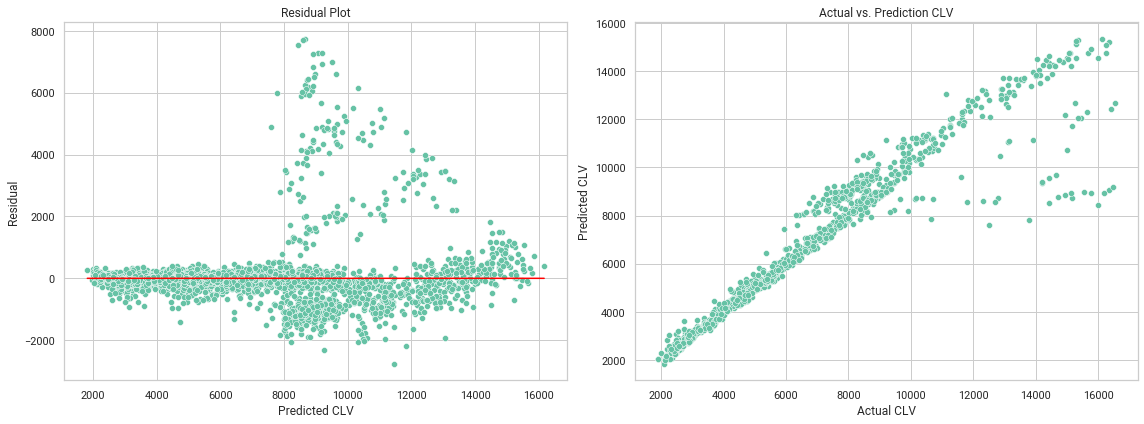

In [70]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

Residual plot diatas menunjukkan bahwa prediksi model ini cukup akurat untuk memprediksi CLV < 8000 karena terlihat dengan banyaknya nilai error yang mendekati nilai 0. Diatas 8000 menunjukkan bahwa variance dari residual tidak seragam (terdapat nilai yang overprediction (error mencapai 2000) dan underprediction (error mencapai 7000)). Pada plot Actual vs Predicted CLV, hasil prediksi juga menunjukkan hasil cukup akurat karena plotnya membentuk satu garis lurus dengan terdapat beberapa outlier mulai dari rentang ± 9000.

### Feature Importance

Untuk dapat mengetahui feature apa saja yang memprengaruhi prediksi target (CLV), kita dapat mengeceknya melalui function feature_importances_.

In [86]:
# Mengambil nama features dari onehot encoder
f_onehot = col_transform.named_transformers_['onehot'].get_feature_names_out()

# Mengambil nama features dari ordinal encoder
f_ordinal = col_transform.transformers[1][1].cols

# Mengambil nama feature yang ter-passthrough dari ColumnTransformer
f_remain = X_train.iloc[:, col_transform.transformers_[2][2]].columns

# Menggabungkan nama-nama feature
all_feat = list(f_onehot) + list(f_ordinal) + list(f_remain)

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : gbr_tuning['algo'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
16,Number of Policies,0.672121
17,Monthly Premium Auto,0.258168
2,Vehicle Class_SUV,0.018103
18,Total Claim Amount,0.016436
14,Coverage,0.010399
19,Income,0.009294
0,Vehicle Class_Luxury Car,0.004395
1,Vehicle Class_Luxury SUV,0.003515
5,EmploymentStatus_Employed,0.001908
8,EmploymentStatus_Unemployed,0.001479


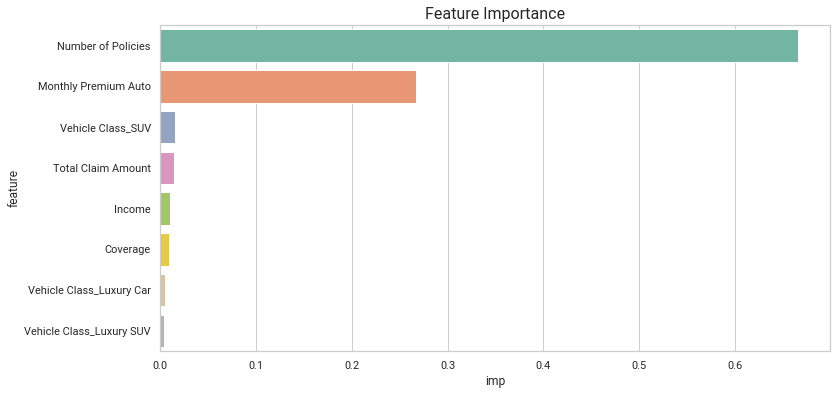

In [72]:
# Bar feature importance
plt.figure(figsize=(12,6))
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')
plt.title('Feature Importance', size=16);

## Conclusion

Pada modeling yang sudah dilakukan, feature `Number of Policies` dan `Monthly Premium Auto` menjadi feature yang paling berpengaruh terhadap `Customer Lifetime Value`. Hal ini selaras dengan asumsi diawal bahwa kedua feature tersebut pun memiliki korelasi positif terkuat dengan `Customer Lifetime Value`.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, dan MAPE. Jika ditinjau dari nilai MAE (karena lebih mudah diinterpretasikan) yang dihasilkan setelah dilakukannya hyperparameter tuning yaitu 373.974, kita dapat menyimpulkan bahwa apabila kemudian hari model yang sudah dibangun akan memperkirakan CLV perusahaan asuransi mobil pada rentang nilai sesuai dengan limitasi model (maksimal nilai CLV 16624.75), maka perkiraan nilai CLV dapat meleset ± 373.974 dari nilai CLV yang seharusnya. Atau apabila dengan nilai MAPE, maka perkiraan nilai CLV dapat meleset ± 4.8% dari aktual nilai CLV.

Namun hal ini tidak menutup kemungkinan prediksinya meleset lebih jauh karena terdapat variance yang tidak seragam pada residual plot (estimasi pada CLV > 8000). Bias yang dihasilkan dari model ini dapat dikarenakan oleh kurangnya feature dan data pada dataset yang bisa lebih merepresentasikan nilai CLV itu sendiri.

**Limitasi Model**

Untuk menjadi perhatian, model ini memiliki limitasi dalam memprediksi nilai CLV dimana apabila model ini dideploy dan terdapat data yang melebihi limitasi model, maka hasilnya menjadi kurang akurat. Adapun limitasi model sebagai berikut:
- Maksimal biaya premi asuransi mobil (`Monthly Premium Auto`) = $224.42
- Maksimal total klaim (`Total Claim Amount`) = $1777
- Mampu memprediksi `Customer Lifetime Value` dengan baik pada rentang maksimal 16624.75. Diatas nilai tersebut, hasil akan bias.

## Recommedation

**Untuk Modeling Machine Learning**

1. Mengecek prediksi mana saja yang memiliki error yang tinggi (baik yang overprediction / underprediction), kemudian dieksplorasi lebih lanjut untuk feature apa saja yang mengakibatkan error tinggi.
2. Jika memungkinkan, menambahkan feature-feature yang berhubungan dengan prediksi CLV seperti periode lamanya menjadi customer asuransi mobil, klasifikasi dari coverage asuransi (misal. Basic I, Basic II, Basic III, dll), wilayah tempat tinggal, dan lainnya.
2. Penambahan data customer agar machine learning dapat memprediksi CLV lebih baik lagi.
3. Model yang sudah dibangun dapat dimanfaatkan untuk pengembangan model selanjutnya seperti mengeksplore penggunaan unsupervised learning (clustering) untuk dapat melakukan segmentasi customer yang profitable dan unprofitable agar penentuan strategi marketing lebih baik lagi.

**Untuk Bisnis**

1. Sehubungan dengan `Number of Policies` dan `Monthly Premium Auto` menjadi feature yang paling berpengaruh dalam memprediksi CLV, maka disarankan untuk dapat membuat personalized offer kepada customer agar dapat lebih menjawab kebutuhan customer berdasarkan jumlah polis dan biaya premi yang dibayarkan. Personalized offer ini akan menguntungkan karena budget marketing yang akan digunakan pun juga lebih personalized sehingga menghindari adanya membayar lebih untuk low-value customer dan kehilangan high-value customer.
2. Dengan mengetahui hasil prediksi CLV dari machine learning, maka perusahaan disarankan untuk dapat melakukan upselling dan cross-selling kepada customer. Dengan upselling dan cross-selling ini akan memberi peluang kepada penambahan pembelian polis dan biaya premi yang dibayarkan dimana berpotensi meningkatkan CLV customer juga.

---

**Save Model**

In [81]:
# import pickle

# gbr_tuning = grid_gbr.best_estimator_
# gbr_tuning

# Fit
# gbr_tuning.fit(X, y)

# Save with Pickle
# pickle.dump(gbr_tuning, open('model_gradientboost_CLV.sav', 'wb'))

In [82]:
# Load model
# file_model = 'model_gradientboost_CLV.sav'
# model_loaded = pickle.load(open(file_model, 'rb'))